## ABILITÁ INFORMATICHE E TELEMATICHE A.A. 2022/2023
### Sara Sbernardori
### PRIMA PARTE                                                                                                  

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 1. APERTURA DEL FILE CONTENENTE LA PRIMA MISURA DEL PRIMO INSIEME DI DATI

In [2]:
fname='data/MockMeasures_2PCF_Test1/MockMeasures_2PCF_Correlation_MULTIPOLES_Test1_1.fits'
file=fits.open(fname)

In [3]:
file[1].data

FITS_rec([(  0.59975,  8.54205150e+00, 0., -3.44217353e+00, 0., -3.05878863e+00),
          (  1.59925,  2.89127955e+00, 0., -5.54919428e-01, 0., -8.97318156e-01),
          (  2.59875,  1.51079053e+00, 0., -2.18552188e-01, 0., -3.49992133e-01),
          (  3.59825,  9.58324561e-01, 0., -1.17000828e-01, 0., -1.31833928e-01),
          (  4.59775,  6.68471660e-01, 0., -8.96877154e-02, 0., -1.52346569e-01),
          (  5.59725,  4.98214450e-01, 0., -9.94204219e-02, 0., -9.31585195e-02),
          (  6.59675,  3.90214392e-01, 0., -2.82246323e-02, 0., -5.29329306e-02),
          (  7.59625,  2.99754650e-01, 0., -6.91685268e-02, 0., -8.83656107e-02),
          (  8.59575,  2.49860708e-01, 0., -4.73030365e-02, 0., -5.44634927e-02),
          (  9.59525,  1.97435768e-01, 0., -6.22467439e-02, 0., -8.51734824e-02),
          ( 10.59475,  1.75106286e-01, 0., -4.41889582e-02, 0., -4.15635943e-02),
          ( 11.59425,  1.41045038e-01, 0., -3.94166804e-02, 0., -3.87499395e-02),
          ( 12.5

### 2. LETTURA DI UN SINGOLO MULTIPOLO DA UN SET LIMITATO DI DATI

In [4]:
Nbins=200 #Lunghezza vettore di dati
Nmeasures=10000 #Può arrivare fino a 10000, noi facciamo 100 per ora
test=1 #Si trova nel nome del file
measures=[]
for i in np.arange(Nmeasures)+1:
    fname= f'data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    
    file=fits.open(fname)
    table=file[1].data.copy()
    measures.append(table['XI0']) #XI0 è il primo multipolo, 'SCALE' è la prima colonna con i bin
    if i==1:
        scale=table['SCALE']    
    del table
    file.close()
    
measures=np.asarray(measures)   #Converte l'input in un array, nella riga i ho il primo multipolo del file i-esimo


In [5]:
measures.shape #ci dice la dimensione dell'array, dovrebbe essere (1000,200), prendo 200 misure 1000 volte

(10000, 200)

### 3. CALCOLO DELLA MATRICE DI COVARIANZA NUMERICA CON NUMPY

In [6]:
measures_transpose = measures.transpose()
measures_transpose.shape

(200, 10000)

In [7]:
%%time
covMatrix=np.cov(measures_transpose, bias=True) #matrice 200x200
print(covMatrix)

[[ 3.97259012e-04  3.96961958e-04  3.96028539e-04 ... -2.72705303e-06
  -2.75635924e-06 -2.79146168e-06]
 [ 3.96961958e-04  3.97296567e-04  3.96993234e-04 ... -2.80059144e-06
  -2.84074377e-06 -2.88676863e-06]
 [ 3.96028539e-04  3.96993234e-04  3.97321484e-04 ... -2.85975199e-06
  -2.91106405e-06 -2.96832966e-06]
 ...
 [-2.72705303e-06 -2.80059144e-06 -2.85975199e-06 ...  4.04244649e-04
   4.03839776e-04  4.02791809e-04]
 [-2.75635924e-06 -2.84074377e-06 -2.91106405e-06 ...  4.03839776e-04
   4.04073958e-04  4.03663688e-04]
 [-2.79146168e-06 -2.88676863e-06 -2.96832966e-06 ...  4.02791809e-04
   4.03663688e-04  4.03892834e-04]]
CPU times: user 41.3 ms, sys: 7.58 ms, total: 48.9 ms
Wall time: 17.5 ms


In [8]:
covMatrix.shape

(200, 200)

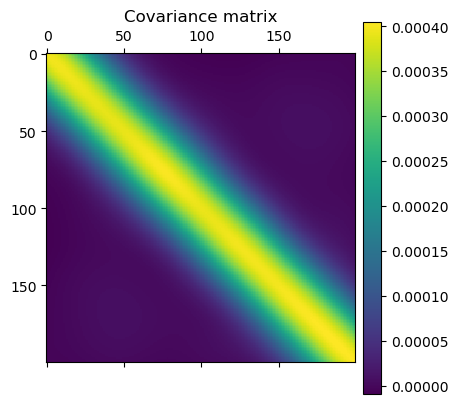

In [9]:
plt.matshow(covMatrix)

plt.title('Covariance matrix') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()

### 4. CALCOLO DELLA MATRICE DI COVARIANZA NUMERICA SENZA NUMPY

In [10]:
D_mean=np.mean(measures, axis=0) #vettore con le medie, 0 è l'asse verticale
print(D_mean)
D_mean=np.asarray(D_mean)
D_mean.shape


[ 8.58511267e+00  2.93516259e+00  1.55534620e+00  1.00340280e+00
  7.13922395e-01  5.43888390e-01  4.35963703e-01  3.45433594e-01
  2.95326207e-01  2.42547884e-01  2.19728680e-01  1.85045320e-01
  1.61803919e-01  1.45847715e-01  1.32065821e-01  1.14263985e-01
  1.01908025e-01  9.48234279e-02  8.31612736e-02  7.85278981e-02
  6.99380232e-02  6.13588320e-02  5.60389104e-02  5.18494984e-02
  4.62206250e-02  4.88636768e-02  4.56156001e-02  3.76746038e-02
  3.41918190e-02  3.28986222e-02  3.46500108e-02  3.13488697e-02
  3.11970911e-02  2.78863433e-02  2.50802738e-02  2.52658570e-02
  2.32538028e-02  2.11578565e-02  1.96525556e-02  1.86681589e-02
  1.94020115e-02  1.71948471e-02  1.26853363e-02  1.33146038e-02
  1.66410876e-02  1.21143513e-02  1.04230198e-02  9.45792505e-03
  9.25662792e-03  5.31584164e-03  4.02705159e-03  3.51881027e-03
  4.05781416e-03  1.85385358e-03  3.47087059e-03  2.21024562e-03
  9.88320065e-04  2.13624996e-03  2.65793937e-04 -1.12909844e-03
 -6.58664901e-04 -5.87066

(200,)

In [11]:
Mean_matrix=np.zeros((Nmeasures,Nbins),dtype=float) 
#Ogni riga di questa matrice è formata dal vettore delle medie (D_mean) calcolato prima.
for i in range(Nmeasures):
    Mean_matrix[i,:]=D_mean
Mean_matrix.shape
print(Mean_matrix)

[[ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]
 [ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]
 [ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]
 ...
 [ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]
 [ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]
 [ 8.58511267  2.93516259  1.5553462  ... -0.01979589 -0.01697108
  -0.01649838]]


In [12]:
Dev_matrix=measures-Mean_matrix #Matrice con la deviazione dalla media
print(Dev_matrix)

[[-0.04306117 -0.04388304 -0.04455568 ...  0.01994318  0.01998241
   0.02004246]
 [ 0.01849101  0.01834667  0.01823077 ... -0.00381935 -0.00494356
  -0.0060685 ]
 [ 0.02171096  0.02237505  0.02299902 ...  0.0212537   0.02165381
   0.02198289]
 ...
 [ 0.01953233  0.01985956  0.02011206 ... -0.01801749 -0.01756583
  -0.01702626]
 [ 0.01301511  0.01399918  0.01494489 ... -0.00630823 -0.00597326
  -0.0057528 ]
 [-0.00100564 -0.00263491 -0.00413116 ...  0.01070796  0.01243407
   0.0141424 ]]


In [13]:
 %%time
 C=np.zeros((Nbins,Nbins),dtype=float) #Matrice covarianza senza np

 for n in range(Nmeasures):
     for i in range(Nbins):
         for j in range(Nbins):
             C[i][j] = (Dev_matrix[n][i]*Dev_matrix[n][j]) + C[i][j]
            
 C=C/(Nmeasures-1) 
 C.shape
 print(C)


[[ 3.97298741e-04  3.97001658e-04  3.96068145e-04 ... -2.72732576e-06
  -2.75663490e-06 -2.79174085e-06]
 [ 3.97001658e-04  3.97336301e-04  3.97032937e-04 ... -2.80087153e-06
  -2.84102787e-06 -2.88705734e-06]
 [ 3.96068145e-04  3.97032937e-04  3.97361221e-04 ... -2.86003799e-06
  -2.91135518e-06 -2.96862652e-06]
 ...
 [-2.72732576e-06 -2.80087153e-06 -2.86003799e-06 ...  4.04285077e-04
   4.03880164e-04  4.02832092e-04]
 [-2.75663490e-06 -2.84102787e-06 -2.91135518e-06 ...  4.03880164e-04
   4.04114369e-04  4.03704058e-04]
 [-2.79174085e-06 -2.88705734e-06 -2.96862652e-06 ...  4.02832092e-04
   4.03704058e-04  4.03933227e-04]]
CPU times: user 4min 49s, sys: 1.72 s, total: 4min 51s
Wall time: 4min 50s


 Vediamo quanto sono diverse le due matrici di covarianza 

In [14]:
print('La più grande differenza tra la mia matrice di covarianza e quella di numpy è: {}'.format(np.max(np.abs(C-covMatrix))))

La più grande differenza tra la mia matrice di covarianza e quella di numpy è: 4.051461827267108e-08


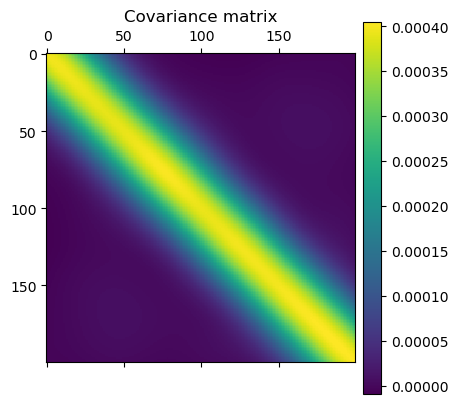

In [15]:
 plt.matshow(C)

 plt.title('Covariance matrix') 
 plt.colorbar(orientation="vertical", pad=0.02)

 plt.show()

### 5. COVARIANZA TEORICA

In [16]:
if test==1:
    sig = [0.02, 0.02, 0.02]
    h = [25, 50, 75]
elif test==2:
    sig = [0.02, 0.01, 0.005]
    h = [50, 50, 50]
else:
    sig = [0.02, 0.01, 0.005]
    h = [5, 5, 5]

###### COVARIANZA TEORICA SOLO DEL PRIMO MULTIPOLO SENZA CORRELAZIONI

In [17]:
C_th=np.zeros((Nbins,Nbins),dtype=float) #Covarianza teorica 

for i in range(Nbins):
    for j in range(Nbins):
        C_th[i][j]=sig[0]**2.*np.exp(-(scale[i]-scale[j])**2./(2.*h[0]**2.))
print(C_th)

[[4.00000000e-04 3.99680448e-04 3.98723321e-04 ... 1.35491674e-17
  9.88126977e-18 7.19480000e-18]
 [3.99680448e-04 4.00000000e-04 3.99680448e-04 ... 1.85489054e-17
  1.35491674e-17 9.88126977e-18]
 [3.98723321e-04 3.99680448e-04 4.00000000e-04 ... 2.53530251e-17
  1.85489054e-17 1.35491674e-17]
 ...
 [1.35491674e-17 1.85489054e-17 2.53530251e-17 ... 4.00000000e-04
  3.99680448e-04 3.98723321e-04]
 [9.88126977e-18 1.35491674e-17 1.85489054e-17 ... 3.99680448e-04
  4.00000000e-04 3.99680448e-04]
 [7.19480000e-18 9.88126977e-18 1.35491674e-17 ... 3.98723321e-04
  3.99680448e-04 4.00000000e-04]]


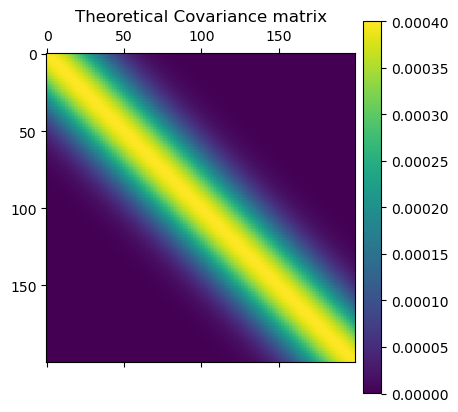

In [18]:
plt.matshow(C_th)

plt.title('Theoretical Covariance matrix') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()

##### MATRICE DEI RESIDUI NON NORMALIZZATA

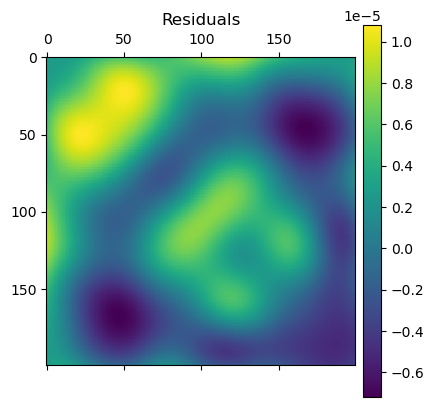

In [19]:
plt.matshow(C_th-covMatrix)

plt.title('Residuals') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()

### 6. MATRICE DI CORRELAZIONE

In [20]:
R=np.zeros((Nbins,Nbins),dtype=float) #Matrice di correlazione

for i in range(Nbins):
    for j in range(Nbins):
        R[i][j]=C_th[i][j]/(C_th[i][i]*C_th[j][j])**0.5
print(R)

[[1.00000000e+00 9.99201119e-01 9.96808304e-01 ... 3.38729186e-14
  2.47031744e-14 1.79870000e-14]
 [9.99201119e-01 1.00000000e+00 9.99201119e-01 ... 4.63722635e-14
  3.38729186e-14 2.47031744e-14]
 [9.96808304e-01 9.99201119e-01 1.00000000e+00 ... 6.33825629e-14
  4.63722635e-14 3.38729186e-14]
 ...
 [3.38729186e-14 4.63722635e-14 6.33825629e-14 ... 1.00000000e+00
  9.99201119e-01 9.96808304e-01]
 [2.47031744e-14 3.38729186e-14 4.63722635e-14 ... 9.99201119e-01
  1.00000000e+00 9.99201119e-01]
 [1.79870000e-14 2.47031744e-14 3.38729186e-14 ... 9.96808304e-01
  9.99201119e-01 1.00000000e+00]]


##### RESIDUI TRA COVARIANZA TEORICA E MISURA NORMALIZZATI ALLA LORO VARIANZA

In [21]:
Res=np.zeros((Nbins,Nbins),dtype=float) #Matrice dei residui normalizzati

for i in range(Nbins):
    for j in range(Nbins):
        Res[i][j]=(C_th[i][j]-covMatrix[i][j])*((Nmeasures-1)/((1.+R[i][j])*C_th[i][i]*C_th[j][j]))**0.5 #gaussiana con media 0 e deviazione standard 1
Res_2=Res.reshape(Nbins**2)
x=np.arange(0,Nbins**2)

In [22]:
rms_deviation=np.std(Res_2)

print(f"rms deviation of normalized residuals: {rms_deviation}")

rms deviation of normalized residuals: 0.9478294379200767


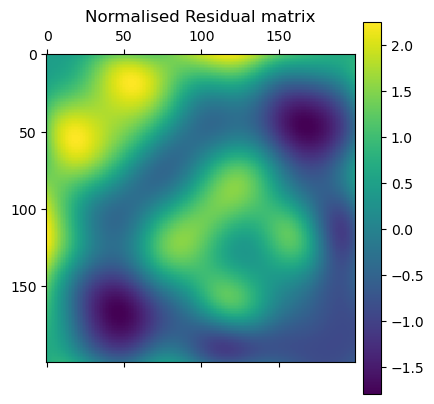

In [23]:
plt.matshow(Res)

plt.title('Normalised Residual matrix') #aggiungi la barra laterale e fare anche la correlazione
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()